![imagen](./img/coche.png)
# Análisis del precio de coches de segunda mano en España

## Índice

1. Introducción
2. Hipótesis principales
3. Adecuación del dataset
4. Análisis
5. Resultados



## 1. Introducción

**El Mercado de Coches de Coches de Segunda Mano en España** tiene una gran relevancia. Su tendencia se ve marcada por factores que sitúan este sector como uno de los más fuertes. 
Para tener un punto de partida en este análisis es preciso exponer la fuente de datos con la que vamos a trabajar:

- El dataset principal y único; con el que trabajeremos, toma el nombre de *"Coches de segunda mano"*. Principalmente, está compuesto por anuncios de venta de coches de segunda mano en platamormas. [Se puede accer al dataset através de este enlace](https://www.kaggle.com/datasets/datamarket/venta-de-coches).

- Por otro lado, en este estudio trabajaremos y analizaremos como se sitúa y establece el precio respecto a los datos que contiene el dataset. Así también, detallar como se relacionan las diferentes variables de la base de datos.  

## 2. Hipótesis principales

* La presencia de los coches de combustión predomina frente a los coches electricos.
* Hay mayor porcentaje de coches híbridos frente a coches eléctricos.
* La evolución del mercado en relación con el tipo de combustible será pausada. 
* La presencia de los coches hibridos y electricos es mayor en Madrid y Barcelona.
* En las princpipales ciudades de España los precios son más elevados
* El kilometraje de los coches afecta directamente al nivel de precios.
* El nombre de la marca de los coches afecta al precio.
* La tendencia de los anuncios se ve marcada por la marca del vehículo.

## 3. Adecuación del dataset

1. Comprensión de los datos:
- En primer lugar realizamos un análisis del dataset. De esta manera, podemos tener la información básica. Esto nos hace entender como esta estructurada la base de datos, la naturaleza de las variables, registros y missings existentes.
- Acontinuación se muestran la tabla de variables con el tipo de dato y su posible aportación al análisis: 

*Esta parte está trabajada en el nootbook : EDA.ipynb*

In [2]:
import pandas as pd

In [3]:
variables = pd.read_excel("data\Tabla de variables.xlsx", index_col = 0)
variables

,Naturaleza,Tipo de Dato,Aportación al Análisis
Variable,,,
url,Categórica,Object,Url del coche de segunda mano.
company,Categórica,Object,Web de donde se ha realizado la extracción del...
make,Categórica,Object,Marca del coche.
model,Categórica,Object,Modelo específico del coche.
version,Categórica,Object,Versión o descripción del coche.
price,Numérica,Int,Precio de venta del coche en euros.
price financed,Numérica,Float,Precio financiado de venta del coche en euros.
fuel,Categórica,Cadena,"Tipo de combustible del vehículo (diésel, gaso..."
year,Numérica,Int,Año de fabricación del coche.


2. Trabajamos con los datos:
- Una vez hemos conocido los aspectos más relevantes y comprendido la estructura de la base de datos; debemos empezar a realizar un proceso de carga, limpieza, transformación y filtrado de los datos partiendo del datset original.

In [4]:
data = pd.read_csv("data/coches-de-segunda-mano-sample.csv")
data.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


- En primer lugar hemos procedido a cambiar el formato del nombre de las columnas. De esta forma se puede trabajar y visualizar mejor el DataFrame.

- Seguidamente, hemos eliminado columnas que no se han considerado necesarias para el análisis, identificadores, constantes, columnas a null. También, se han renombrado columnas y se ha modificado la presentacion del contnido de algunas.

- En tercer lugar se han establecido los formatos adecuados para los datos. 

*Esta parte está trabajada en el nootbook : EDA1.ipynb* 

- Finalmente, tras haber realizado estos primeros pasos presentamos el dataset final y lo cargamos:

In [5]:
df_final = pd.read_csv("data/df_final.csv")
df_final.head()

,Car brand,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Type of retailer,Dealer,Province,Publication year
0,CITROEN,C1,6200.0,Gasolina,2017,50071.0,82.0,5,Manual,Professional,Autos Raymara,Tenerife,2021
1,FORD,Transit Connect,7851.0,Diésel,2016,103000.0,100.0,4,Manual,Professional,Auto 96,Barcelona,2020
2,VOLKSWAGEN,Caravelle,19426.0,Diésel,2014,120000.0,140.0,4,Manual,Professional,Inniauto,Navarra,2020
3,FORD,Transit,22850.0,Diésel,2017,107000.0,130.0,2,Manual,Professional,"Autofleet España,s.l",Sevilla,2021
4,PEUGEOT,3008,11490.0,Gasolina,2016,78665.0,130.0,5,Manual,Professional,Flexicar Rivas,Madrid,2021


In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car brand         41348 non-null  object 
 1   Model             41348 non-null  object 
 2   Price             41348 non-null  float64
 3   Fuel              41348 non-null  object 
 4   Year              41348 non-null  int64  
 5   Kms               41348 non-null  float64
 6   Power             41348 non-null  float64
 7   Doors             41348 non-null  int64  
 8   Shift             41348 non-null  object 
 9   Type of retailer  41348 non-null  object 
 10  Dealer            41348 non-null  object 
 11  Province          41348 non-null  object 
 12  Publication year  41348 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 4.1+ MB


## 4. Análisis

*Esta parte está trabajada en el nootbook : EDA1.ipynb* 

Importamos las librerías necesarias para realizar el análisis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Estilo de los gráficos
sns.set_style("darkgrid")

### 1. Análisis univariante del Precio.

Como primer paso mostramos dos histogramas de precios superpuestos en una sola figura:
- Se puede ver que la mayoría de los coches tienen precios más bajos, ya que la barra del histograma es más alta en el extremo izquierdo.
- Podemos visualizar como se distribuyen los precios de los coches el conjunto de datos. 
- Detectamos precios alejados del rango en el que se sitúa la mayoría.

In [9]:
price = df_final["Price"].sort_values()

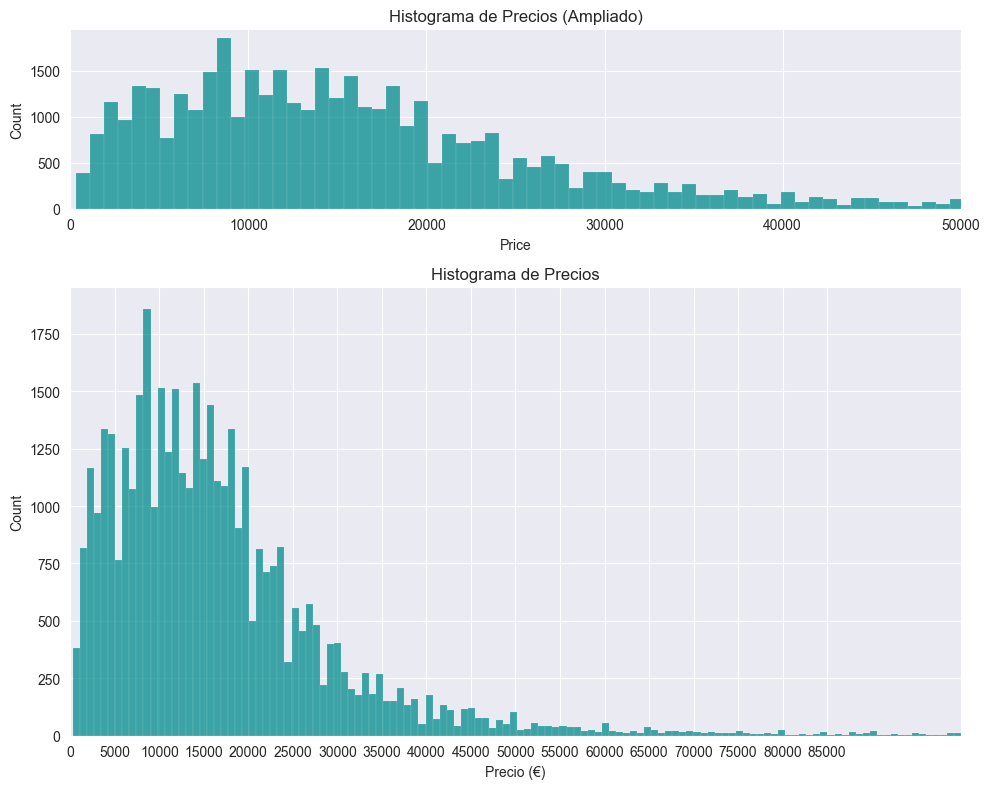

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 5]})

sns.histplot(price, color="darkcyan", ax=axs[1])
axs[1].set_title('Histograma de Precios')
axs[1].set_xlabel('Precio (€)')
axs[1].set_xlim(0, 100000)
axs[1].set_xticks(np.arange(0, 90000, 5000))


sns.histplot(price, color="darkcyan", ax=axs[0])
axs[0].set_title('Histograma de Precios (Ampliado)')
axs[0].set_xlim(0, 50000) 

plt.tight_layout()


- El siguiente diagrama de caja proporciona una representación visual de la distribución de precios de los vehículos. Permite identificar la mediana, los valores atípicos y la dispersión de precios en el rango especificado. En este caso, se ha limitado la visualización a precios de hasta 100,000 euros para enfocarse en ese rango de precios. Además podemos detectar gran dispersión de outliers para esta variable.

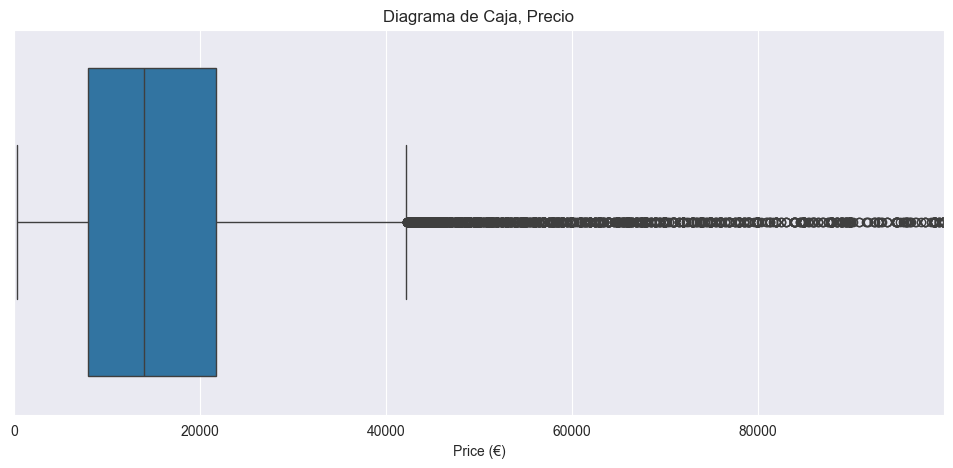

In [11]:
plt.figure(figsize=(12, 5))

sns.boxplot(x=df_final['Price'], orient='h')
plt.xlabel("Price (€)")
plt.title("Diagrama de Caja, Precio")
plt.xlim(0, 100000)
plt.xticks(np.arange(0, 100000, 20000))

plt.show()

- Medidas de dispersión de la variable precio:

In [12]:
estadisticas = pd.read_csv("data/df_estadisticas.csv")
estadisticas

,Medidas,Cuartil 1 (Q1),Mediana,Cuartil 3 (Q3),Rango,Mínimo,Máximo,Media,Moda,Varianza,Desviación Estándar
0,Valor,7999.0,13999.0,21700.0,549600.0,300.0,549900.0,17372.462997,17900.0,2.945546e+08,17162.592503


### 2. Análisis bivariante

En este análisis analizamos el precio como la variable principal. Además situaremos a esta en un vs otras del data set para ver que comportamiento se establece. De esta manera, podemos tener una mejor perspectiva de como se influyen o relacionan. 
Analizamos:

- Precio y tipo de combustible:

In [13]:
group_data = df_final.groupby(['Car brand','Fuel', 'Year'])['Price'].mean().reset_index()

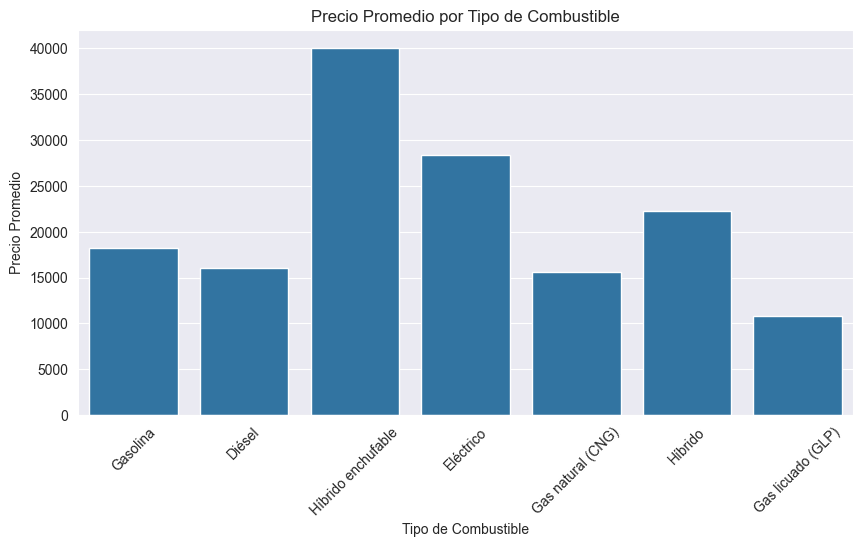

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Fuel', y='Price', data=df_final, errorbar=None)
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio por Tipo de Combustible")
plt.xticks(rotation=45);


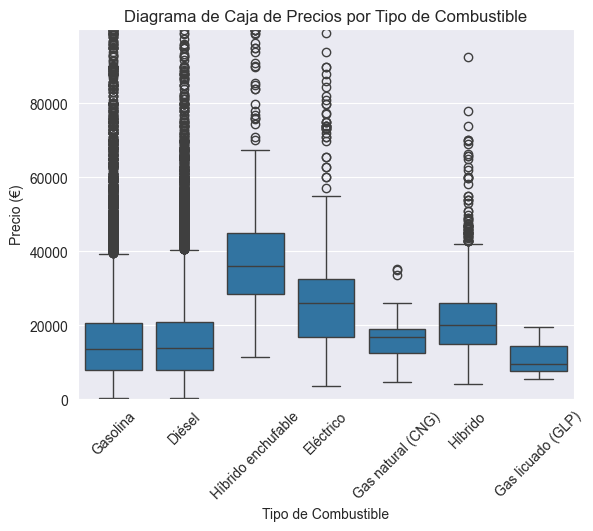

In [15]:
plt.figure()
sns.boxplot(x='Fuel', y='Price', data=df_final)
plt.title('Diagrama de Caja de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio (€)')
plt.ylim(0,100000)
plt.yticks(np.arange(0,100000,20000))
plt.xticks(rotation=45, fontsize=10);

- Precio y provincia:

In [50]:
df_final_sorted = df_final.sort_values(by='Price', ascending=True)

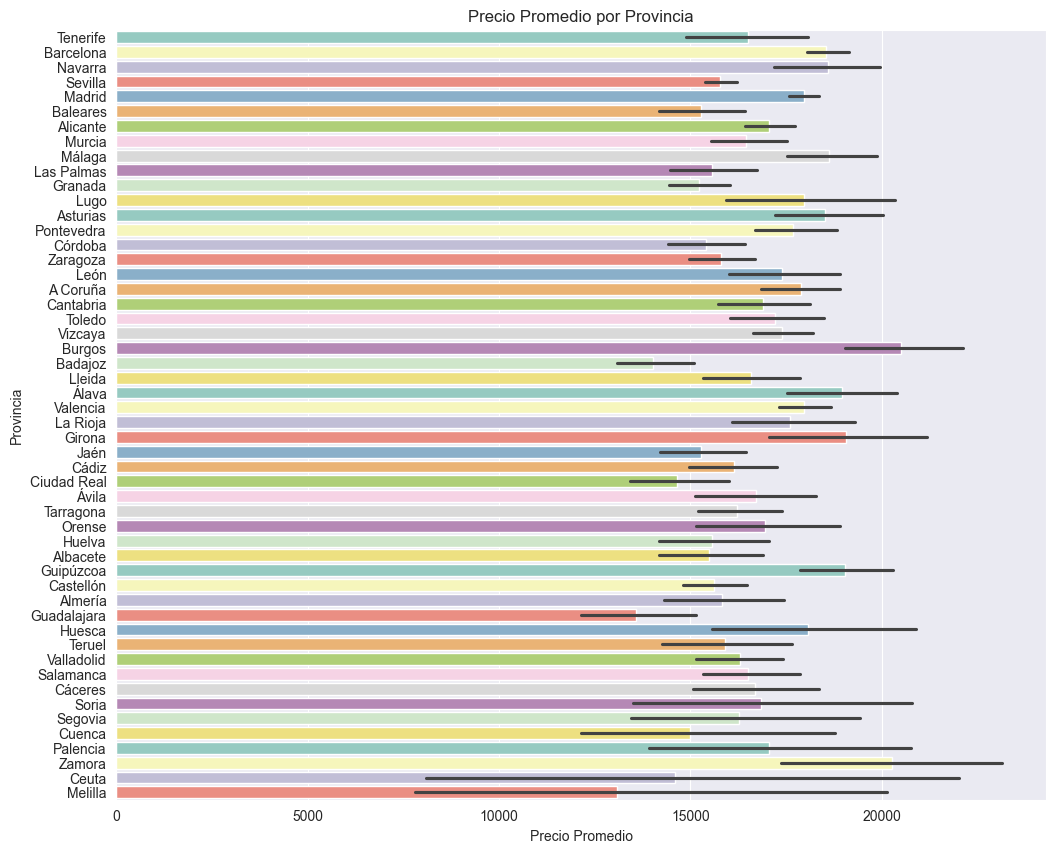

In [57]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_final, y='Province', x='Price', hue = "Province", palette= "Set3")
plt.ylabel("Provincia")
plt.xlabel("Precio Promedio")
plt.title("Precio Promedio por Provincia");

- Precio y año de fabricación:

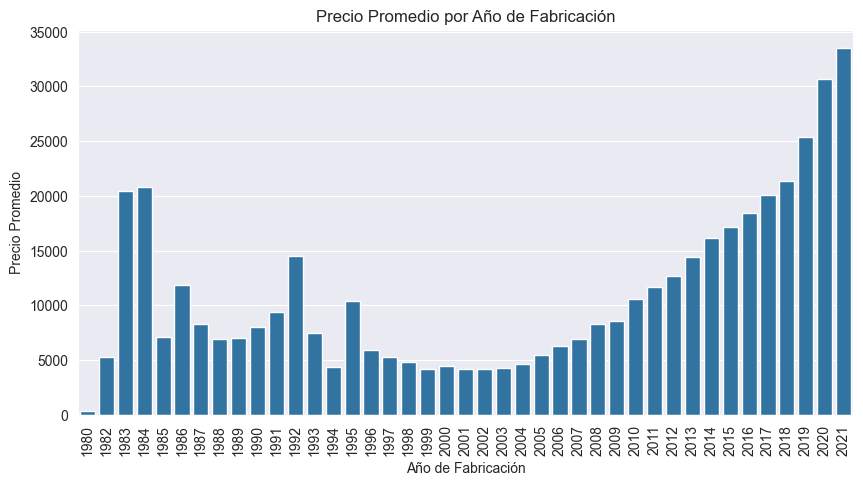

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Price', data=df_final, errorbar=None)
plt.xlabel("Año de Fabricación")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio por Año de Fabricación")
plt.xticks(rotation=90);


- Precio y marca de coche:

In [43]:
precio_promedio_por_marca = df_final.groupby('Car brand')['Price'].mean().sort_values(ascending=False)


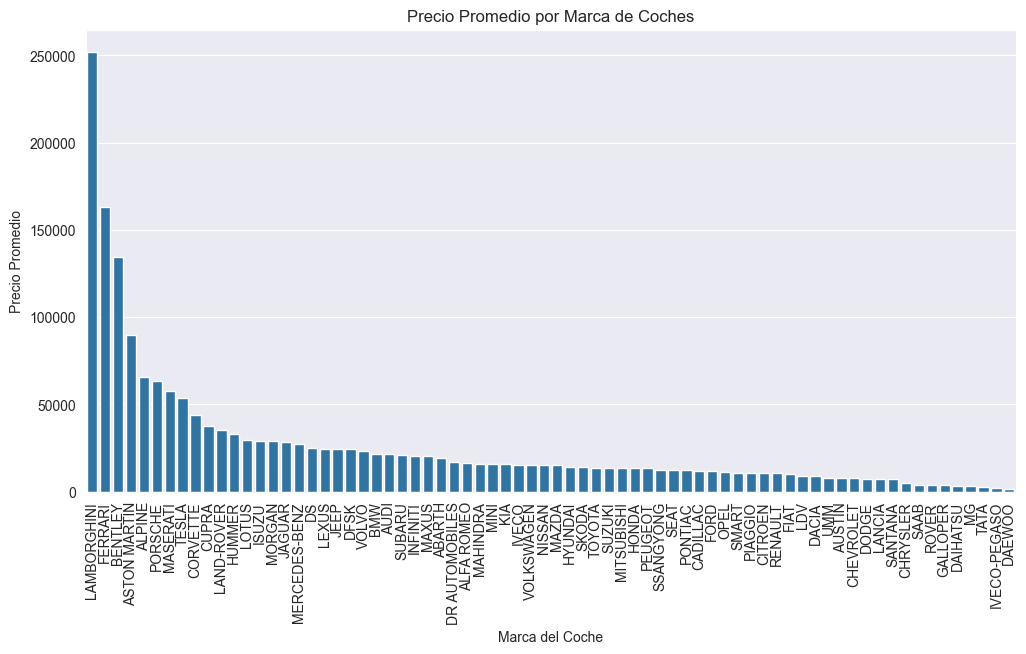

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=precio_promedio_por_marca.index, y=precio_promedio_por_marca.values)
plt.title("Precio Promedio por Marca de Coches")
plt.xlabel("Marca del Coche")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)
plt.show()

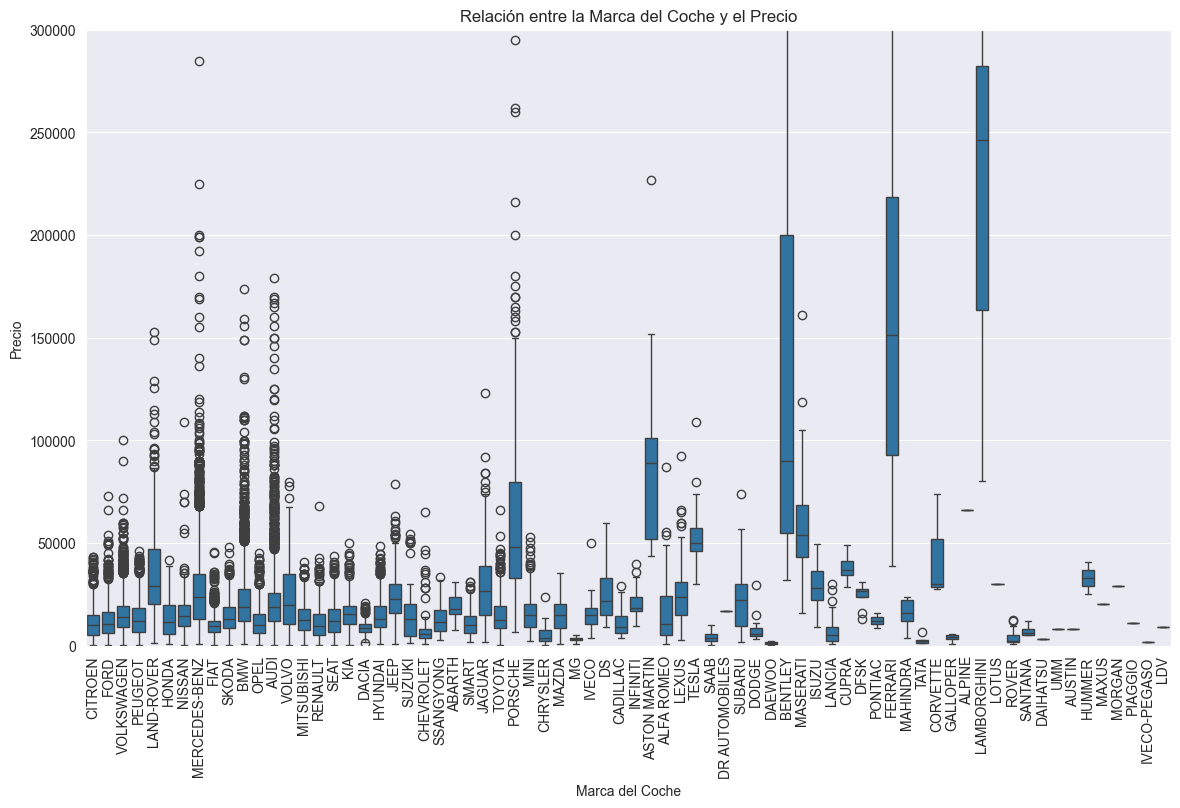

In [45]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Car brand', y='Price', data=df_final)
plt.title('Relación entre la Marca del Coche y el Precio')
plt.xlabel('Marca del Coche')
plt.ylim(0,300000)
plt.ylabel('Precio')
plt.xticks(rotation=90)  
plt.show()

In [21]:
coches_count = df_final['Car brand'].value_counts()

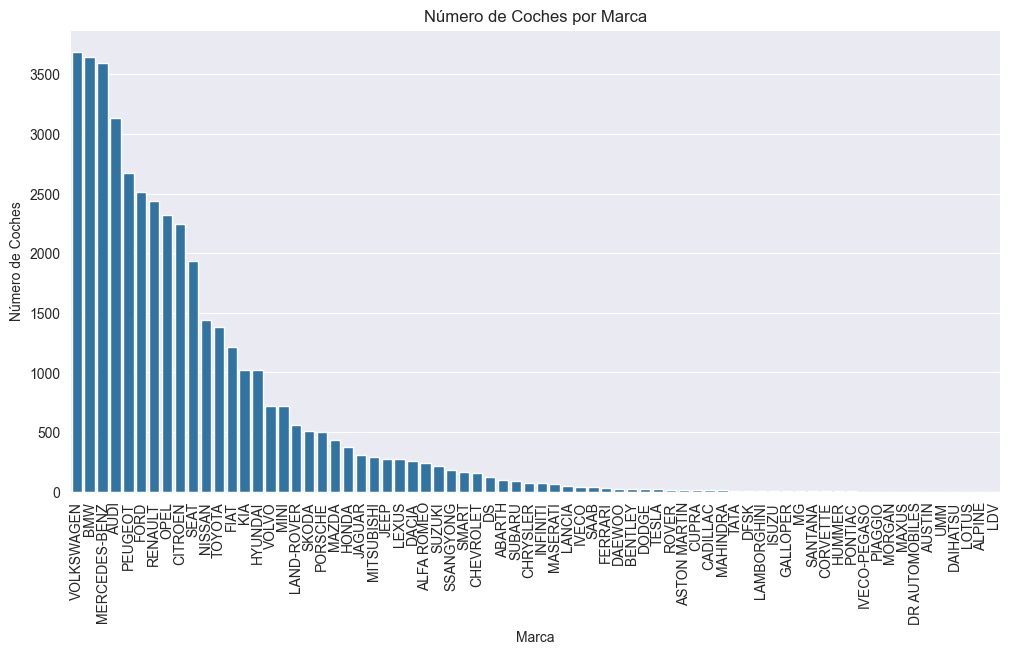

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=coches_count.index, y=coches_count.values)
plt.title("Número de Coches por Marca")
plt.xlabel("Marca")
plt.ylabel("Número de Coches")
plt.xticks(rotation=90);

-Precio y Kms de los coches:

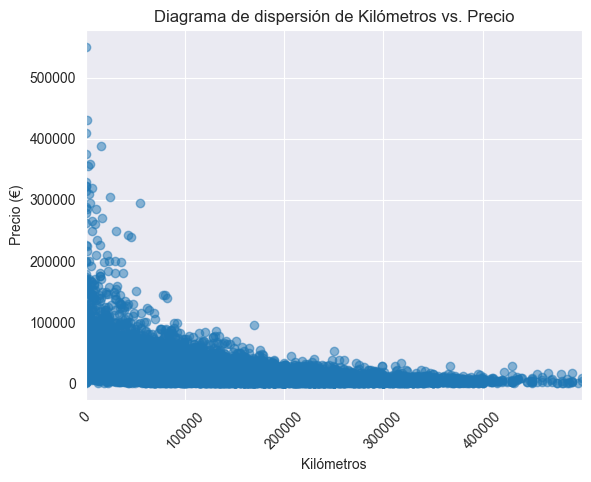

In [23]:
plt.figure()
plt.scatter(df_final['Kms'], df_final['Price'], alpha=0.5)
plt.title('Diagrama de dispersión de Kilómetros vs. Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio (€)')
plt.xlim(0,500000)
plt.xticks(np.arange(0,500000, 100000))
plt.xticks(rotation=45, fontsize=10);

-Precio y potencia de los coches:

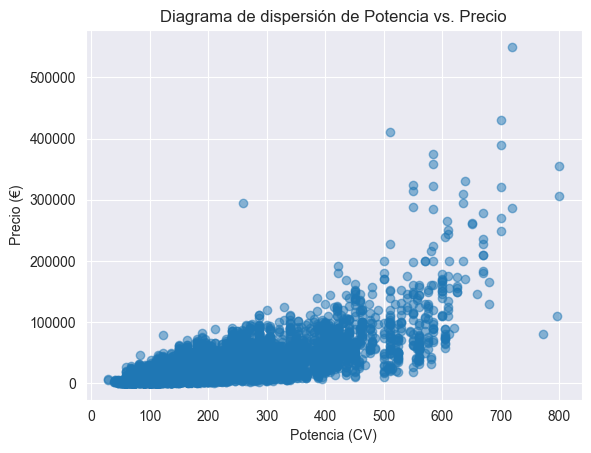

In [24]:
plt.figure()
plt.scatter(df_final['Power'], df_final['Price'], alpha=0.5)
plt.title('Diagrama de dispersión de Potencia vs. Precio')
plt.xlabel('Potencia (CV)')
plt.ylabel('Precio (€)');

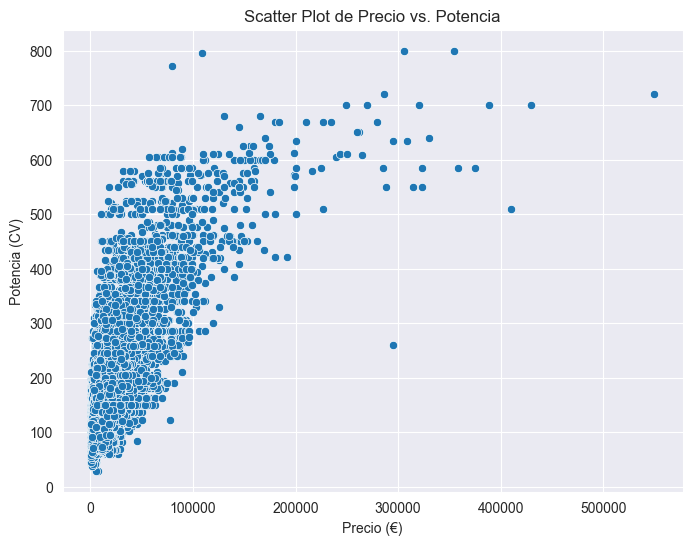

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Price", y="Power", data=df_final)
plt.title("Scatter Plot de Precio vs. Potencia")
plt.xlabel("Precio (€)")
plt.ylabel("Potencia (CV)");

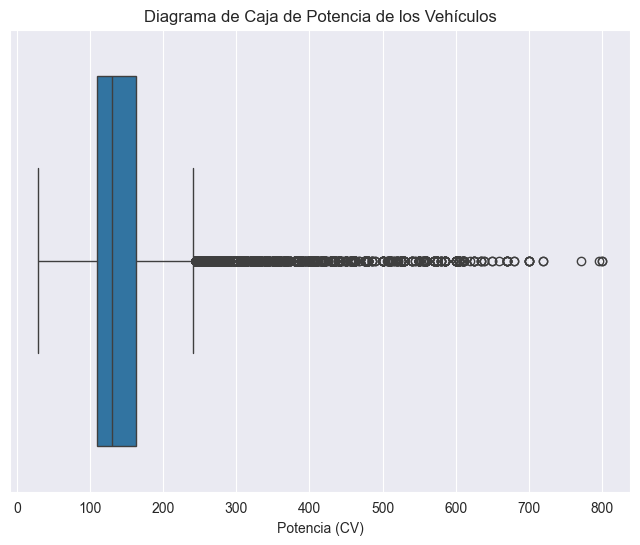

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_final['Power'])
plt.title("Diagrama de Caja de Potencia de los Vehículos")
plt.xlabel("Potencia (CV)")
plt.show()

Veamos también como se relacionan fuera del precio otras variables:

- Año de fabricación y tipo de combustible: no facilita poder entender con es la evolución del mercado.

In [27]:
coches_por_año_combustible = df_final.groupby(['Year', 'Fuel']).size().unstack(fill_value=0)


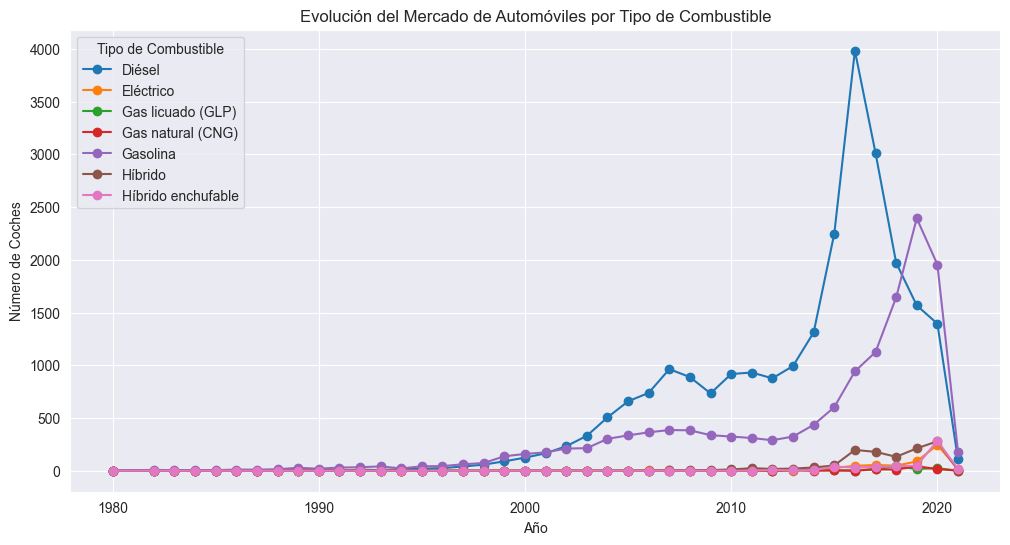

In [28]:
coches_por_año_combustible.plot(kind='line', marker='o', figsize=(12, 6))

# Configuración del gráfico
plt.title("Evolución del Mercado de Automóviles por Tipo de Combustible")
plt.xlabel("Año")
plt.ylabel("Número de Coches")
plt.legend(title="Tipo de Combustible")
plt.grid(True);


- Tipo de combustible por marca de coche:

In [29]:
tabla_cruzada = pd.crosstab(df_final['Car brand'], df_final['Fuel'])
tabla_cruzada.head()

Fuel,Diésel,Eléctrico,Gas licuado (GLP),Gas natural (CNG),Gasolina,Híbrido,Híbrido enchufable
Car brand,,,,,,,
ABARTH,0,0,0,0,96,0,0
ALFA ROMEO,172,0,0,0,69,0,0
ALPINE,0,0,0,0,1,0,0
ASTON MARTIN,0,0,0,0,15,0,0
AUDI,2238,7,0,8,847,0,32


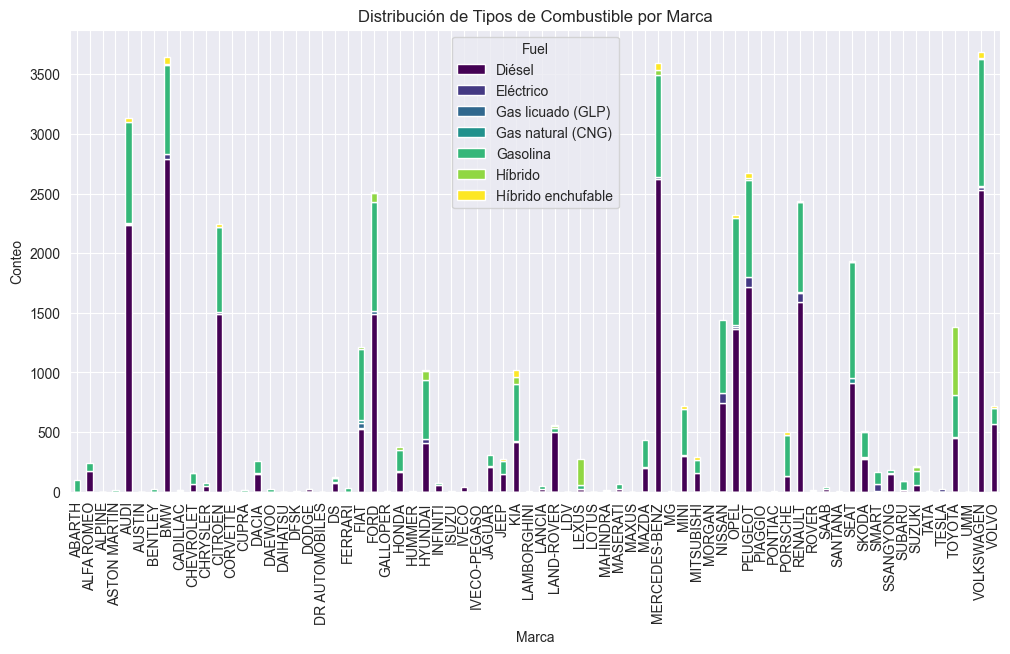

In [30]:
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title("Distribución de Tipos de Combustible por Marca")
plt.xlabel("Marca")
plt.ylabel("Conteo")
plt.xticks(rotation=90);

- Marca y provincia

In [31]:
tabla_cruzada = pd.crosstab(df_final['Province'], df_final['Car brand'])

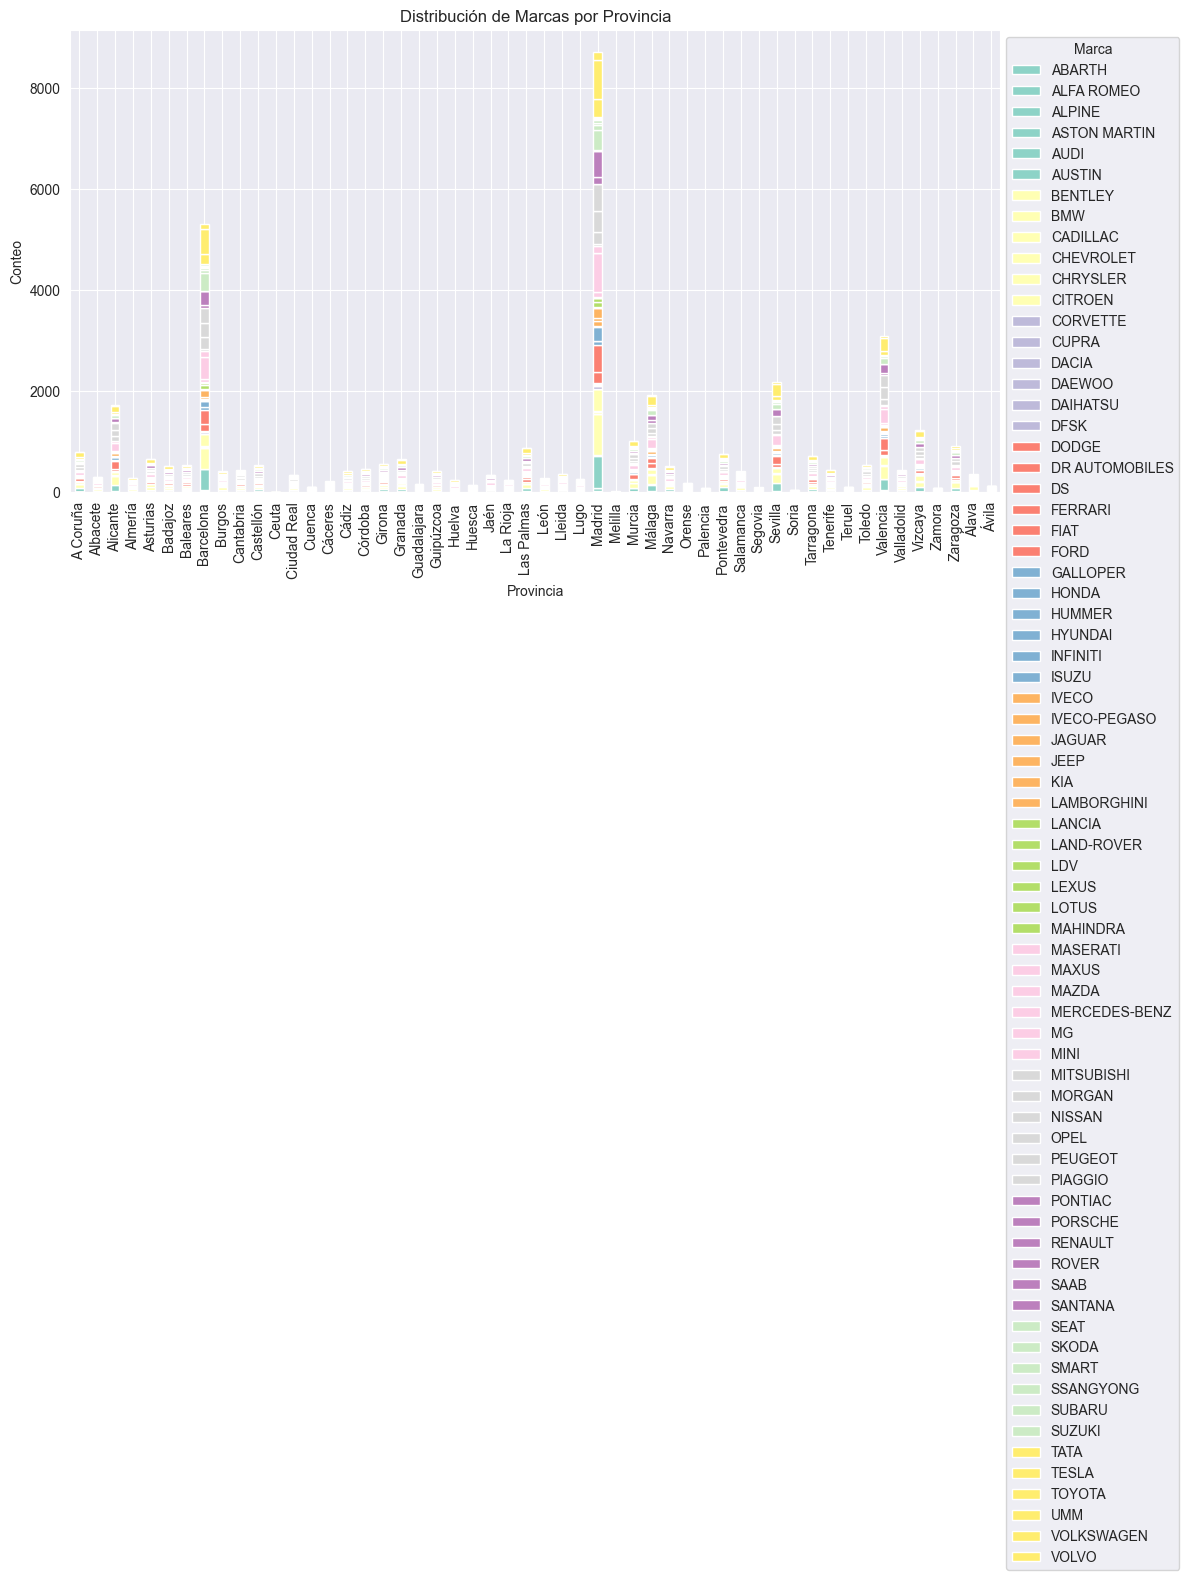

In [32]:
plt.figure(figsize=(12, 6))
tabla_cruzada.plot(kind='bar', stacked=True, cmap="Set3", ax=plt.gca())
plt.title("Distribución de Marcas por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Conteo")
plt.xticks(rotation=90)
plt.legend(title="Marca", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

### 3. Análisis multivariante

Analizamos la correlacion de las variables numéricas del dataset:
- La correlación más fuerte se sitúa entre el precio y la potencia.

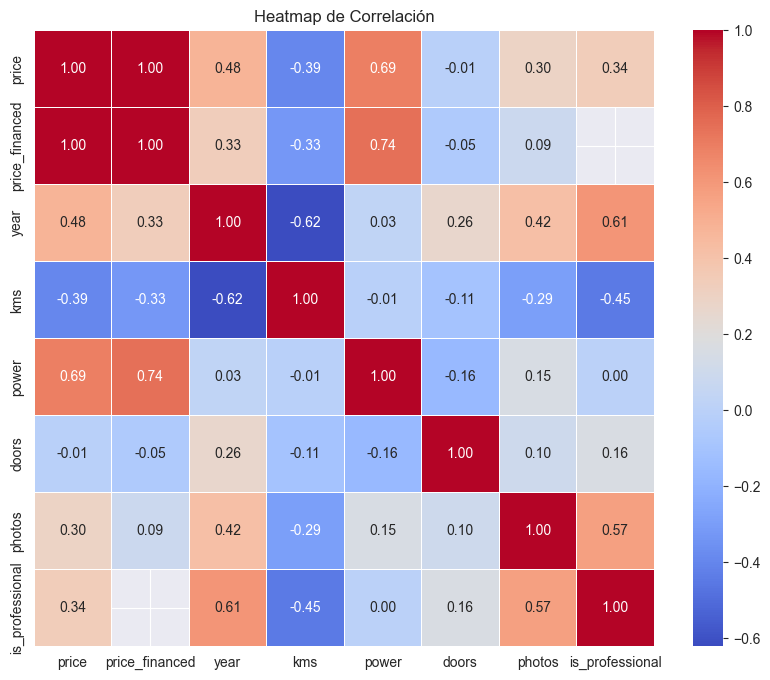

In [33]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación");

- Apoyamos esa visualización con el siguiente gráfico:

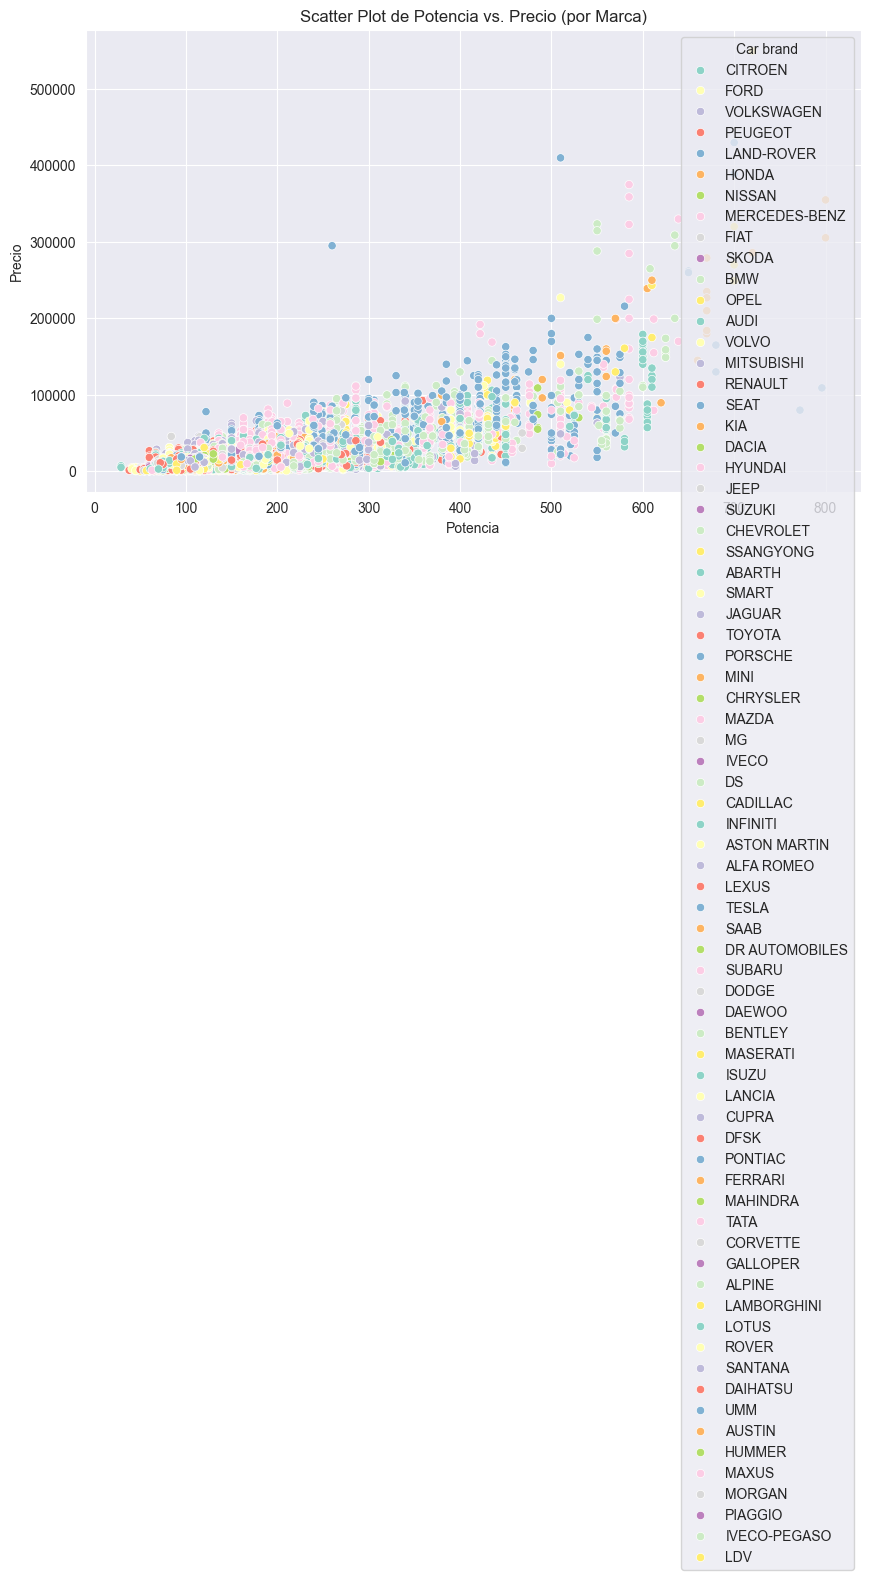

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Power", y="Price", hue="Car brand", data=df_final, palette="Set3")
plt.title("Scatter Plot de Potencia vs. Precio (por Marca)")
plt.xlabel("Potencia")
plt.ylabel("Precio");

- Apoyo del análisis para las hipótesis:

In [35]:

coches_hibridos_electricos = df_final[df_final['Fuel'].isin(['Híbrido enchufable', 'Eléctrico'])]


conteo_ciudades_combustible = coches_hibridos_electricos.groupby(['Province', 'Fuel']).size().unstack(fill_value=0)

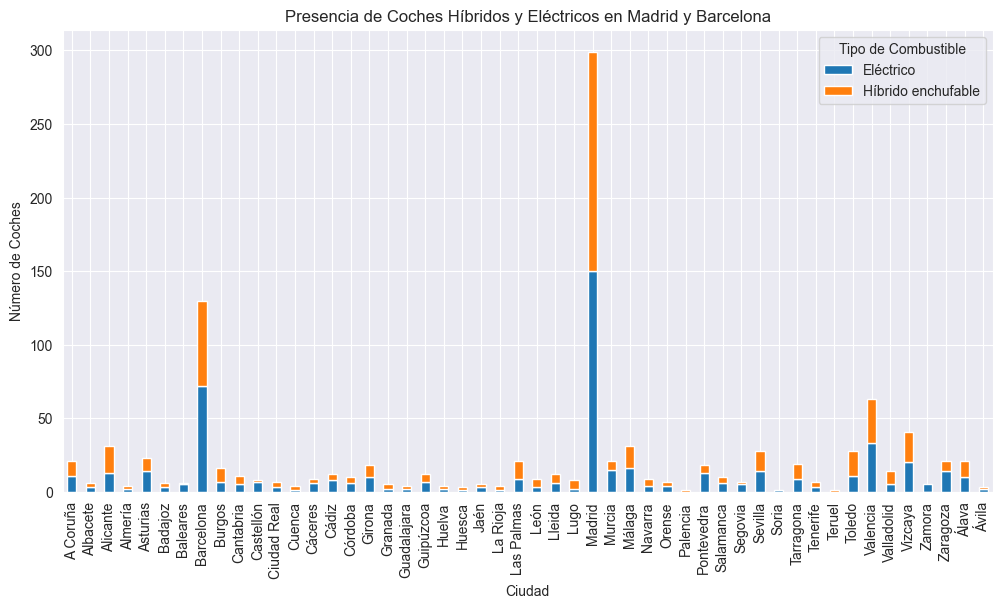

In [36]:
conteo_ciudades_combustible.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Presencia de Coches Híbridos y Eléctricos en Madrid y Barcelona")
plt.xlabel("Ciudad")
plt.ylabel("Número de Coches")
plt.legend(title="Tipo de Combustible")
plt.grid(True);


Madrid VS Barcelona

In [37]:
ciudades_principales = ["Madrid", "Barcelona"]
coches_ciudades_principales = df_final[df_final['Province'].isin(ciudades_principales)]

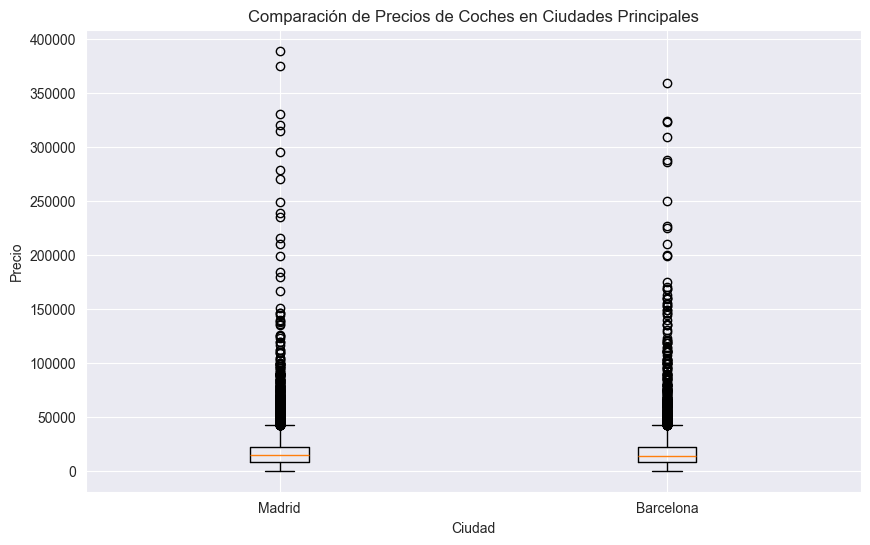

In [38]:
plt.figure(figsize=(10, 6))
plt.boxplot([coches_ciudades_principales[coches_ciudades_principales['Province'] == 'Madrid']['Price'],
             coches_ciudades_principales[coches_ciudades_principales['Province'] == 'Barcelona']['Price']],
            labels=ciudades_principales)
plt.title("Comparación de Precios de Coches en Ciudades Principales")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.grid(True);

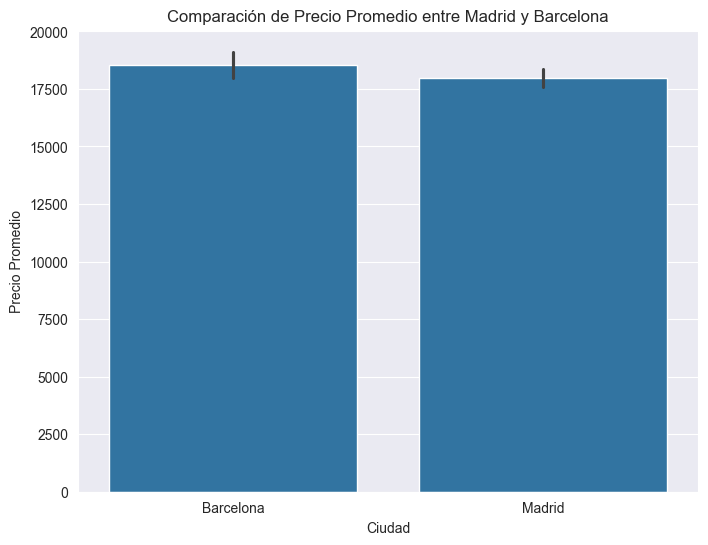

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Province', y='Price', data=coches_ciudades_principales)
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precio Promedio entre Madrid y Barcelona');

### 5. Resultados

- En nuestras primeras dos hipótesis podemos afirmar tras el análisis realizado que los coches de combustión predominan frente a los eléctricos. Así también, que el porcentaje de coches híbridos es mínimamente mayor al de los coches eléctricos. Sin embargo, los coches eléctricos tienen un precio medio más elevado.

In [40]:
coches_por_combustible = df_final['Fuel'].value_counts()
total_coches = len(df_final)
porcentajes_combustible = (coches_por_combustible / total_coches) * 100
print("Porcentaje de coches por tipo de combustible:")
print(porcentajes_combustible)

Porcentaje de coches por tipo de combustible:
Fuel
Diésel                60.288285
Gasolina              33.808165
Híbrido                2.834478
Eléctrico              1.339847
Híbrido enchufable     1.233433
Gas licuado (GLP)      0.275709
Gas natural (CNG)      0.220083
Name: count, dtype: float64


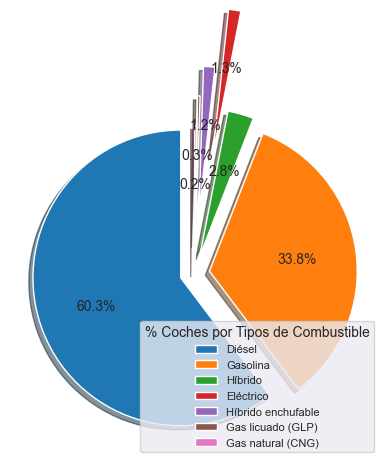

In [41]:
myexplode = [0.1, 0.1, 0.12, 0.8, 0.4, 0.2, 0]
fig, ax = plt.subplots()
ax.pie(coches_por_combustible, labels=[''] * len(coches_por_combustible.index), autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True, labeldistance=1.3)
ax.legend(coches_por_combustible.index, title= "% Coches por Tipos de Combustible", loc="lower right",prop={"size": 8});


- En nuestra tercera hipótesis podemos afirmar que la evolución del mercado ha tenido una tendencia pausada respecto al tipo de combustible y año de fabricación. La transición hacia coches evolucionados tiene una pendiente casi plaa. La presencia de los coches de combustión respecto a posibles preferencias, precio medio y demás variables se mantienen como puntos fuertes del mercado.

- Respecto a la cuarta hipótesis, en el estudio hemos podido confirmar que se cumple que la presencia de los coches hibridos y eléctricos es mayor en Madrid y Barcelona.

- La quinta hipótesis no se cumple, puesto que hemos podido ver que las ciudades principales como Madrid y Barcelona tienen promedios altos pero no son las únicas.

- El número de kilómetros que tiene un coche afecta al precio, pero de forma inversa. A más kilómetros menor es el precio. Lo hemos podido comprobar relacionando y enfrentando estas variables en el análisis.

- Hemos podido comprbar que hay marcas muy reconocidas que se situan en una posición de precios elevada. Sin embargo hay un rango establecido, que no marca mucho la diferencia en este mercado en cuanto a la marca.

- Finalmente, la última hipótesis se puede descartar ya que se trata de la disponibilidad en la plataforma de los coches. Si que se puede ver mayor conteo de algunas marcas; sin embargo, no hemos podido ver más allá.